<a href="https://colab.research.google.com/github/Kaguya2906/Chicago-City-Crime-Data-Retrieval-Platform/blob/main/02.%20Neo4j%3A%20nodes%20and%20relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neo4j

- Neo4j：a NoSQL database, which show the relationship between columns and doing filter.
- Use Case：show only one row relationship between column to clarify the data frame.

Showcase of nodes and relationships for 14 columns in the dataset. The resulting graph imported from the DBMS is attached at the end of the notebook.

In [ ]:
import requests
import numpy as np
import pandas as pd

## Data Cleansing
(only need to run one time to get the cleaned version)

In [ ]:
# df = pd.read_csv("Crimes_-_2001_to_Present.csv")
# df = df.drop(['IUCR','Beat','District','Ward','Community Area','FBI Code','X Coordinate','Y Coordinate'], axis=1)
# df = df.dropna()
# column_mapping = {'Case Number': 'Case_Number', 'Primary Type': 'Primary_Type', 'Location Description': 'Location_Description','Updated On':'Updated_On'}
# df.rename(columns=column_mapping, inplace=True)
# df.to_csv('Crimes - 2001 to Present.csv', index=False)

## Filters
filter only one row of data as shown data

In [ ]:
df = pd.read_csv("Crimes - 2001 to Present.csv")
test = df.iloc[1:2]
test

,ID,Case_Number,Date,Block,Primary_Type,Description,Location_Description,Arrest,Domestic,Year,Updated_On,Latitude,Longitude,Location
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,2015,02/10/2018 03:50:01 PM,41.89508,-87.7654,"(41.895080471, -87.765400451)"


In [ ]:
test.to_csv('test.csv', index=False)

## Connection to Neo4j

In [ ]:
from neo4j import GraphDatabase

database_name = "neo4j"
username = "neo4j"
password = "apan5400"
uri = "bolt://localhost:7687/apan5400"

driver = GraphDatabase.driver(uri, auth=(username, password))
session = driver.session()

print("Successfully connected to Neo4j!")

Successfully connected to Neo4j!


## Import and create relationships

In [ ]:
query = (
    "LOAD CSV WITH HEADERS FROM 'file:///D:/Neo4j/.Neo4jDesktop/test.csv' AS line "
    "CREATE (case_num:case_num { \
                   case_num: line.Case_Number \
                               } \
            )"

     "MERGE (date:Date {case_num: line.Date})"
     "MERGE (pri_type:Primary_Type {case_num: line.Primary_Type})"
     "MERGE (arrest:Arrest {case_num: line.Arrest})"
     "MERGE (year:Year {case_num: line.Year})"
     "MERGE (location:Location {case_num: line.Location})"
     "MERGE (block:Block {case_num: line.Block})"
     "MERGE (description:Description {case_num: line.Description})"
     "MERGE (loc_description:Location_Description {case_num: line.Location_Description})"
     "MERGE (domestic:Domestic {case_num: line.Domestic})"
     "MERGE (update:Updated_On {case_num: line.Updated_On})"
     "MERGE (latitude:Latitude {case_num: line.Latitude})"
     "MERGE (longitude:Longitude {case_num:line.Longitude})"
     "CREATE (case_num)-[:HAPPENED_AT]->(date)"
     "CREATE (date)-[:BELONG_TO]->(year)"
     "CREATE (case_num)-[:UPDATED_ON]->(update)"
     "CREATE (case_num)-[:LOCATED_IN]->(location)"
     "CREATE (location)-[:INCLUDE_LONGITUDE]->(longitude)"
     "CREATE (location)-[:INCLUDE_LATITUDE]->(latitude)"
     "CREATE (block)-[:ADDRESS_IN]->(location)"
     "CREATE (loc_description)-[:BELONG_TO]->(block)"
     "CREATE (case_num)-[:RESULT]->(arrest)"
     "CREATE (case_num)-[:IS_TYPE]->(pri_type)"
     "CREATE (description)-[:DESCRIBE]->(pri_type)"
     "CREATE (domestic)-[:IS_OR_NOT]->(pri_type)"
    )

result = session.run(query)
print("All companies are imported from a csv file!")

All companies are imported from a csv file!


## Delete in the end

In [ ]:
query = ("MATCH (n) DETACH DELETE n")
result = session.run(query)
print("All Nodes and relationships are deleted!")

All Nodes and relationships are deleted!


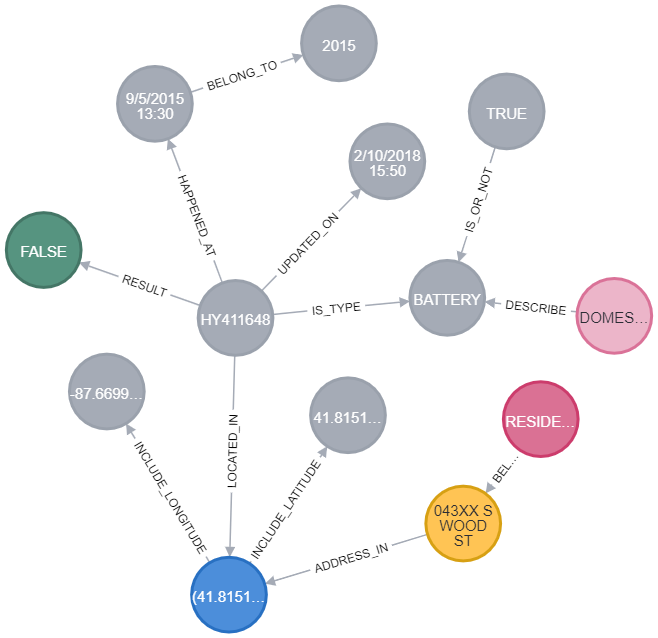